In [306]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [307]:
#import data and review
coaches = pd.read_csv('Coaches9.csv')


print(pd.DataFrame.head(coaches))

coaches.describe()

#review columns for datatypes
coaches.dtypes


                  School Conference              Coach    SchoolPay  \
0              Air Force   Mt. West       Troy Calhoun       885000   
1                  Akron        MAC       Terry Bowden    $411,000    
2                Alabama        SEC         Nick Saban  $8,307,000    
3  Alabama at Birmingham      C-USA         Bill Clark    $900,000    
4      Appalachian State   Sun Belt  Scott Satterfield    $712,500    

      TotalPay        Bonus  BonusPaid AssistantPay        Buyout  
0       885000       247000         --          $0             --  
1    $412,500     $225,000    $50,000           $0      $688,500   
2  $8,307,000   $1,100,000   $500,000           $0   $33,600,000   
3    $900,000     $950,000   $165,471           $0    $3,847,500   
4    $712,500     $295,000   $145,000           $0    $2,160,417   


School          object
Conference      object
Coach           object
SchoolPay       object
TotalPay        object
Bonus           object
BonusPaid       object
AssistantPay    object
Buyout          object
dtype: object

In [308]:
#clean coaches data to remove non-numeric values
cols = ['SchoolPay', 'TotalPay', 'Bonus','BonusPaid','Buyout']



coaches[cols] = coaches[cols].replace({'\$': '', ',': '','--':'0', ' ':''}, regex=True)

#coaches[cols] = coaches[cols].fillna(0)


#convert columns to a float 
coaches = coaches.astype({'SchoolPay':'float','TotalPay':'float','Bonus':'float','BonusPaid':'float','Buyout':'float'})

coaches.dtypes



School           object
Conference       object
Coach            object
SchoolPay       float64
TotalPay        float64
Bonus           float64
BonusPaid       float64
AssistantPay     object
Buyout          float64
dtype: object

In [309]:
coaches.isnull().values.any()



False

In [310]:
stadium = pd.read_csv('Stadium.csv')

print(pd.DataFrame.head(stadium))

stadium.describe()

#review columns for datatypes
stadium.dtypes


            Stadium      School Conference  Capacity  Capacity_Clean  Opened
0  Michigan Stadium    Michigan    Big Ten    107601             108    1927
1    Beaver Stadium  Penn State    Big Ten    106572             107    1960
2      Ohio Stadium  Ohio State    Big Ten    104944             105    1922
3        Kyle Field   Texas A&M        SEC    102733             103    1904
4   Neyland Stadium   Tennessee        SEC    102521             103    1921


Stadium           object
School            object
Conference        object
Capacity           int64
Capacity_Clean     int64
Opened             int64
dtype: object

In [311]:
#update names to match coaches dataset

stadium['School'] = stadium['School'].str.replace('BYU', 'Brigham Young').str.strip()
stadium['School'] = stadium['School'].str.replace('UNC Charlotte', 'Charlotte').str.strip()
stadium['School'] = stadium['School'].str.replace('Miami', 'Miami (Fla.)').str.strip()
stadium['School'] = stadium['School'].str.replace('Miami \\(Fla\\.\\)-OH', 'Miami (Ohio)').str.strip()
stadium['School'] = stadium['School'].str.replace('NC State', 'North Carolina State').str.strip()
stadium['School'] = stadium['School'].str.replace('SMU', 'Southern Methodist').str.strip()
stadium['School'] = stadium['School'].str.replace('Southern Miss', 'Southern Mississippi').str.strip()
stadium['School'] = stadium['School'].str.replace('TCU', 'Texas Christian').str.strip()
stadium['School'] = stadium['School'].str.replace('UAB', 'Alabama at Birmingham').str.strip()
stadium['School'] = stadium['School'].str.replace('UMass', 'Massachusetts').str.strip()
stadium['School'] = stadium['School'].str.replace('UNLV', 'Nevada-Las Vegas').str.strip()
stadium['School'] = stadium['School'].str.replace('USC', 'Southern California').str.strip()
stadium['School'] = stadium['School'].str.replace('UTEP', 'Texas-El Paso').str.strip()
stadium['School'] = stadium['School'].str.replace('UTSA', 'Texas-San Antonio').str.strip()

/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/3170039883.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  stadium['School'] = stadium['School'].str.replace('Miami \\(Fla\\.\\)-OH', 'Miami (Ohio)').str.strip()


In [312]:
graduationrates = pd.read_csv('GraduationRates.csv')

print(pd.DataFrame.head(graduationrates))

graduationrates.describe()

#review columns for datatypes
graduationrates.dtypes

   Cohort Year                        School                   Conference  \
0         2015  Abilene Christian University              ASUN Conference   
1         2015           University of Akron      Mid-American Conference   
2         2015        Alabama A&M University  Southwestern Athletic Conf.   
3         2015      Alabama State University  Southwestern Athletic Conf.   
4         2015         University of Alabama      Southeastern Conference   

      Sport State  GSR   FGR  
0  Football    TX   75  54.0  
1  Football    OH   74  76.0  
2  Football    AL   66  54.0  
3  Football    AL   71  41.0  
4  Football    AL   89  66.0  


Cohort Year      int64
School          object
Conference      object
Sport           object
State           object
GSR              int64
FGR            float64
dtype: object

In [313]:
#clean up schools to match coaches dataset

#graduationrates['School'] = graduationrates.Schoolstr.replace({'University': '', 'School': ''},regex=True)


graduationrates['School'] = graduationrates.School.str.replace('University' , '')
graduationrates['School'] = graduationrates.School.str.replace('School' , '')
graduationrates['School'] = graduationrates.School.str.replace('of' , '')
graduationrates['School'] = graduationrates.School.str.replace('the' , '')
graduationrates['School'] = graduationrates['School'].str.replace('at Buffalo, the State University of New York', 'Buffalo').str.strip()
graduationrates['School'] = graduationrates['School'].str.replace('Miami \\(Florida\\)', 'Miami (Fla.)').str.strip()
graduationrates['School'] = graduationrates['School'].str.replace('Miami  \\(Ohio\\)', 'Miami (Ohio)').str.strip()
graduationrates['School'] = graduationrates['School'].str.replace('Rutgers, The State   New Jersey, New Brunswick', 'Rutgers').str.strip()
graduationrates['School'] = graduationrates['School'].str.replace('U.S. Air Force Academy', 'Air Force').str.strip()


graduationrates.to_csv('gradtest.csv', index=False)

/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/3255604889.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  graduationrates['School'] = graduationrates['School'].str.replace('Miami \\(Florida\\)', 'Miami (Fla.)').str.strip()
/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/3255604889.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  graduationrates['School'] = graduationrates['School'].str.replace('Miami  \\(Ohio\\)', 'Miami (Ohio)').str.strip()
/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/3255604889.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  graduationrates['School'] = graduationrates['School'].str.replace('U.S. Air Force Academy', 'Air Force').str.strip()


In [314]:
graduationrates.isnull().values.any()


True

In [315]:
graduationrates.isnull().sum()


Cohort Year     0
School          0
Conference      0
Sport           0
State           0
GSR             0
FGR            20
dtype: int64

In [316]:
winloss = pd.read_csv('WinLoss.csv')

print(pd.DataFrame.head(winloss))

winloss.describe()

#review columns for datatypes
winloss.dtypes

  RANK      TEAM   W  L  T    PCT
0    1   Georgia  15  0  0  1.000
1    2  Michigan  13  1  0  0.929
2    3       TCU  13  2  0  0.867
3    4      Troy  12  2  0  0.857
4    -    Tulane  12  2  0  0.857


RANK     object
TEAM     object
W         int64
L         int64
T         int64
PCT     float64
dtype: object

In [317]:
winloss.rename(columns={'TEAM':'School'},inplace=True)
winloss

,RANK,School,W,L,T,PCT
0,1,Georgia,15,0,0,1.000
1,2,Michigan,13,1,0,0.929
2,3,TCU,13,2,0,0.867
3,4,Troy,12,2,0,0.857
4,-,Tulane,12,2,0,0.857
...,...,...,...,...,...,...
126,-,New Mexico,2,10,0,0.167
127,128,Colorado,1,11,0,0.083
128,-,Massachusetts,1,11,0,0.083
129,-,Northwestern,1,11,0,0.083


In [318]:
#clean up schools to match coaches dataset


winloss['School'] = winloss['School'].str.replace('App State', 'Appalachian State').str.strip()
winloss['School'] = winloss['School'].str.replace('Arizona St', 'Arizona State').str.strip()
winloss['School'] = winloss['School'].str.replace('Arkansas St', 'Arkansas State').str.strip()
winloss['School'] = winloss['School'].str.replace('BYU', 'Brigham Young').str.strip()
winloss['School'] = winloss['School'].str.replace('Boston Col', 'Boston College').str.strip()
winloss['School'] = winloss['School'].str.replace('Bowling Grn', 'Bowling Green').str.strip()
winloss['School'] = winloss['School'].str.replace('Central FL', 'Central Florida').str.strip()
winloss['School'] = winloss['School'].str.replace('Central Mich', 'Central Michigan').str.strip()
winloss['School'] = winloss['School'].str.replace('Coastal Car', 'Coastal Carolina').str.strip()
winloss['School'] = winloss['School'].str.replace('Colorado St', 'Colorado State').str.strip()
winloss['School'] = winloss['School'].str.replace('E Carolina', 'East Carolina').str.strip()
winloss['School'] = winloss['School'].str.replace('E Michigan', 'Eastern Michigan').str.strip()
winloss['School'] = winloss['School'].str.replace('Fla Atlantic', 'Florida Atlantic').str.strip()
winloss['School'] = winloss['School'].str.replace('Florida Intl', 'Florida International').str.strip()
winloss['School'] = winloss['School'].str.replace('Florida St', 'Florida State').str.strip()
winloss['School'] = winloss['School'].str.replace('Fresno St', 'Fresno State').str.strip()
winloss['School'] = winloss['School'].str.replace('GA Southern', 'Georgia Southern').str.strip()
winloss['School'] = winloss['School'].str.replace('GA Tech', 'Georgia Tech').str.strip()
winloss['School'] = winloss['School'].str.replace('Kansas St', 'Kansas State').str.strip()
winloss['School'] = winloss['School'].str.replace('LA Lafayette', 'Louisiana-Lafayette').str.strip()
winloss['School'] = winloss['School'].str.replace('LA Tech', 'Louisiana Tech').str.strip()
winloss['School'] = winloss['School'].str.replace('LA Monroe', 'Louisiana-Monroe').str.strip()
winloss['School'] = winloss['School'].str.replace('Miami \\(FL\\)', 'Miami (Fla.)').str.strip()
winloss['School'] = winloss['School'].str.replace('Miami \\(OH\\)', 'Miami (Ohio)').str.strip()
winloss['School'] = winloss['School'].str.replace('Michigan St', 'Michigan State').str.strip()
winloss['School'] = winloss['School'].str.replace('Middle Tenn', 'Middle Tennessee').str.strip()
winloss['School'] = winloss['School'].str.replace('Miss State', 'Mississippi State').str.strip()
winloss['School'] = winloss['School'].str.replace('N Carolina', 'North Carolina').str.strip()
winloss['School'] = winloss['School'].str.replace('N Illinois', 'Northern Illinois').str.strip()
winloss['School'] = winloss['School'].str.replace('N Mex State', 'New Mexico State').str.strip()
winloss['School'] = winloss['School'].str.replace('NC State', 'North Carolina State').str.strip()
winloss['School'] = winloss['School'].str.replace('Oklahoma St', 'Oklahoma State').str.strip()
winloss['School'] = winloss['School'].str.replace('Oregon St', 'Oregon State').str.strip()
winloss['School'] = winloss['School'].str.replace('S Alabama', 'South Alabama').str.strip()
winloss['School'] = winloss['School'].str.replace('S Carolina', 'South Carolina').str.strip()
winloss['School'] = winloss['School'].str.replace('S Florida', 'South Florida').str.strip()
winloss['School'] = winloss['School'].str.replace('S Methodist', 'Southern Methodist').str.strip()
winloss['School'] = winloss['School'].str.replace('S Mississippi', 'Southern Mississippi').str.strip()
winloss['School'] = winloss['School'].str.replace('San Diego St', 'San Diego State').str.strip()
winloss['School'] = winloss['School'].str.replace('San Jose St', 'San Jose State').str.strip()
winloss['School'] = winloss['School'].str.replace('TX Christian', 'Texas Christian').str.strip()
winloss['School'] = winloss['School'].str.replace('TX-San Ant', 'Texas-San Antonio').str.strip()
winloss['School'] = winloss['School'].str.replace('TX El Paso', 'Texas-El Paso').str.strip()
winloss['School'] = winloss['School'].str.replace('U Mass', 'Massachusetts').str.strip()
winloss['School'] = winloss['School'].str.replace('UAB', 'Alabama at Birmingham').str.strip()
winloss['School'] = winloss['School'].str.replace('UNLV', 'Nevada-Las Vegas').str.strip()
winloss['School'] = winloss['School'].str.replace('USC', 'Southern California').str.strip()
winloss['School'] = winloss['School'].str.replace('VA Tech', 'Virginia Tech').str.strip()
winloss['School'] = winloss['School'].str.replace('W Kentucky', 'Western Kentucky').str.strip()
winloss['School'] = winloss['School'].str.replace('W Michigan', 'Western Michigan').str.strip()
winloss['School'] = winloss['School'].str.replace('W Virginia', 'West Virginia').str.strip()
winloss['School'] = winloss['School'].str.replace('Wash State', 'Washington State').str.strip()
winloss['School'] = winloss['School'].str.replace('W Virginia', 'West Virginia').str.strip()
winloss['School'] = winloss['School'].str.replace('W Virginia', 'West Virginia').str.strip()


/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/4215260881.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  winloss['School'] = winloss['School'].str.replace('Miami \\(FL\\)', 'Miami (Fla.)').str.strip()
/var/folders/83/th0nqdn129x2p_9y6f6w9k5w0000gn/T/ipykernel_9360/4215260881.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  winloss['School'] = winloss['School'].str.replace('Miami \\(OH\\)', 'Miami (Ohio)').str.strip()


In [319]:
winloss.isnull().values.any()


False

In [320]:
# merging the datasets together to create one to work off


mergefinal = coaches.merge(stadium, on='School', how='left') 
mergefinal2 = mergefinal.merge(graduationrates, on='School', how='left') 
coachesfinal = mergefinal2.merge(winloss, on='School', how='left')


coachesfinal.to_csv('test3.csv', index=False)
#I have a lot of missing values when I merge the datasets and I cannot figure out why. I've tried to merge in different ways but some values are still missing despite being in both datasets and being match

In [321]:
coachesfinal.isnull().values.any()
len(coachesfinal)

129

In [322]:
coachesfinal.isnull().sum()


School             0
Conference_x       0
Coach              0
SchoolPay          0
TotalPay           0
Bonus              0
BonusPaid          0
AssistantPay       0
Buyout             0
Stadium            1
Conference_y       1
Capacity           1
Capacity_Clean     1
Opened             1
Cohort Year       42
Conference        42
Sport             42
State             42
GSR               42
FGR               43
RANK              46
W                 46
L                 46
T                 46
PCT               46
dtype: int64

In [323]:
#remove duplicate columns and rows with no data
coachesfinal = coachesfinal.drop(coachesfinal.index[coachesfinal.TotalPay == 0])
coachesfinal = coachesfinal.dropna(axis=0, subset=['GSR'])
coachesfinal = coachesfinal.dropna(axis=0, subset=['W'])
coachesfinal = coachesfinal.dropna(axis=0, subset=['L'])
coachesfinal = coachesfinal.dropna(axis=0, subset=['Capacity'])


coachesfinal = coachesfinal.drop(['Conference_y','Opened','Sport','AssistantPay'], axis=1)
coachesfinal.isnull().sum()


School            0
Conference_x      0
Coach             0
SchoolPay         0
TotalPay          0
Bonus             0
BonusPaid         0
Buyout            0
Stadium           0
Capacity          0
Capacity_Clean    0
Cohort Year       0
Conference        0
State             0
GSR               0
FGR               1
RANK              0
W                 0
L                 0
T                 0
PCT               0
dtype: int64

In [324]:
len(coachesfinal)

50

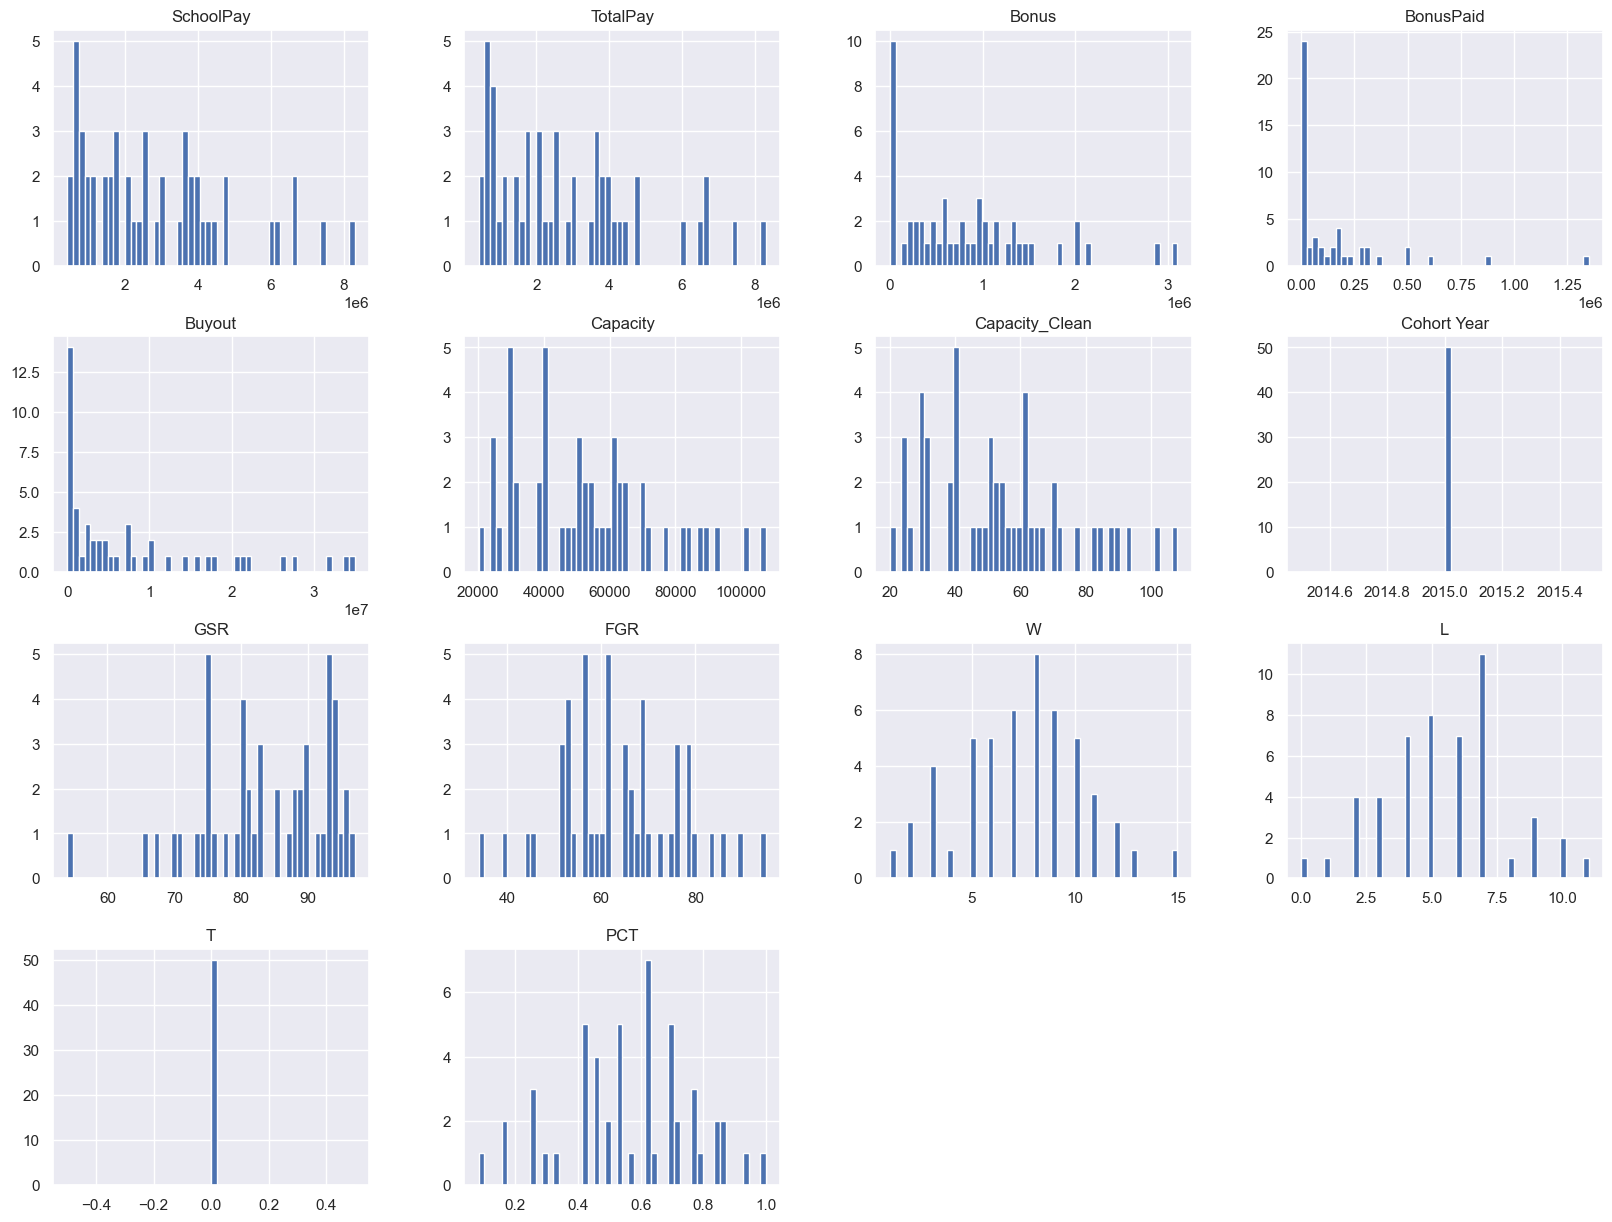

In [325]:
#start to build plots to reivew the data 
%matplotlib inline
import matplotlib.pyplot as plt
coachesfinal.hist(bins = 50, figsize=(20,15))
plt.show()


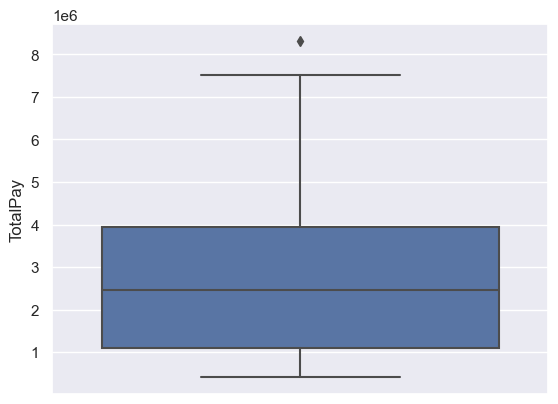

In [326]:
#plot total pay  - shows there is a large range
sns.boxplot(y="TotalPay", data=coachesfinal)
plt.show()

In [327]:
#find highest paid coach 

coachesfinal.loc[coachesfinal['TotalPay'].idxmax()]


School                            Alabama
Conference_x                          SEC
Coach                          Nick Saban
SchoolPay                       8307000.0
TotalPay                        8307000.0
Bonus                           1100000.0
BonusPaid                        500000.0
Buyout                         33600000.0
Stadium              Bryant Denny Stadium
Capacity                         101821.0
Capacity_Clean                      102.0
Cohort Year                        2015.0
Conference        Southeastern Conference
State                                  AL
GSR                                  89.0
FGR                                  66.0
RANK                                    6
W                                    11.0
L                                     2.0
T                                     0.0
PCT                                 0.846
Name: 2, dtype: object

In [328]:
#find lowest paid coach
coachesfinal.loc[coachesfinal['TotalPay'].idxmin()]


School                              Akron
Conference_x                          MAC
Coach                        Terry Bowden
SchoolPay                        411000.0
TotalPay                         412500.0
Bonus                            225000.0
BonusPaid                         50000.0
Buyout                           688500.0
Stadium                InfoCision Stadium
Capacity                          30000.0
Capacity_Clean                       30.0
Cohort Year                        2015.0
Conference        Mid-American Conference
State                                  OH
GSR                                  74.0
FGR                                  76.0
RANK                                  125
W                                     2.0
L                                    10.0
T                                     0.0
PCT                                 0.167
Name: 1, dtype: object

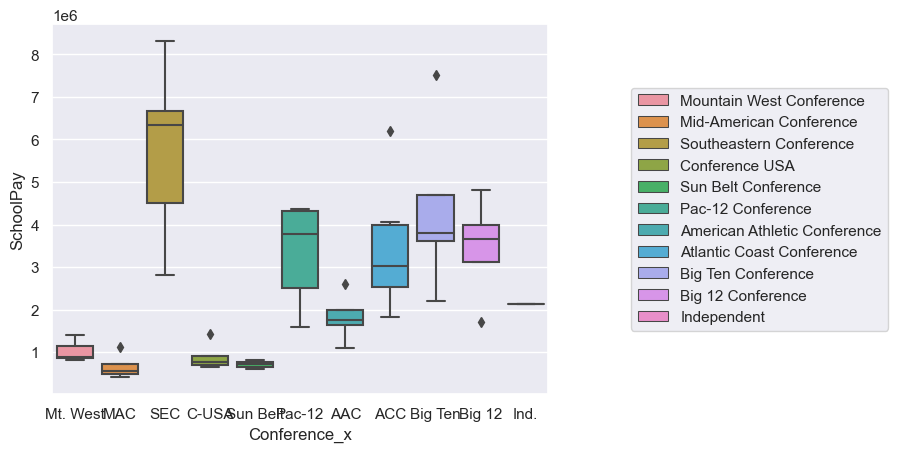

In [329]:
#plot range of pay based on conference

sns.boxplot(x="Conference_x", y="SchoolPay", data=coachesfinal, hue='Conference', dodge=False)
_ = plt.legend(loc='right', bbox_to_anchor=[1.7, 0.5])

plt.show()


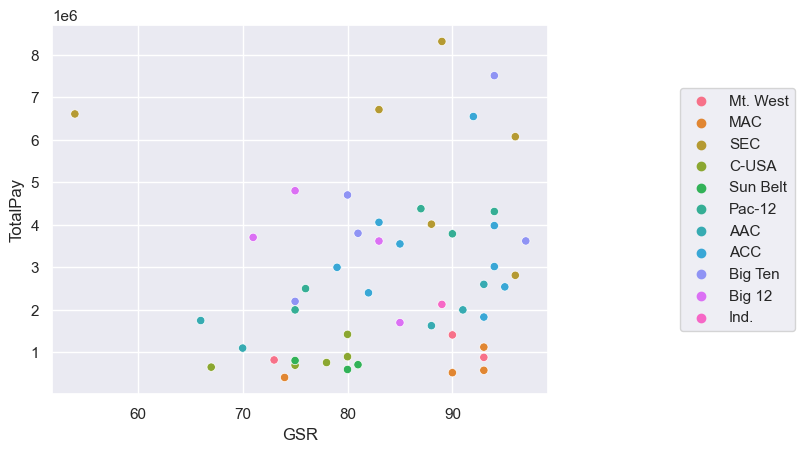

In [330]:
#plot pay against graduation rate 
g = sns.scatterplot(x="GSR", y="TotalPay", hue="Conference_x", data=coachesfinal)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()



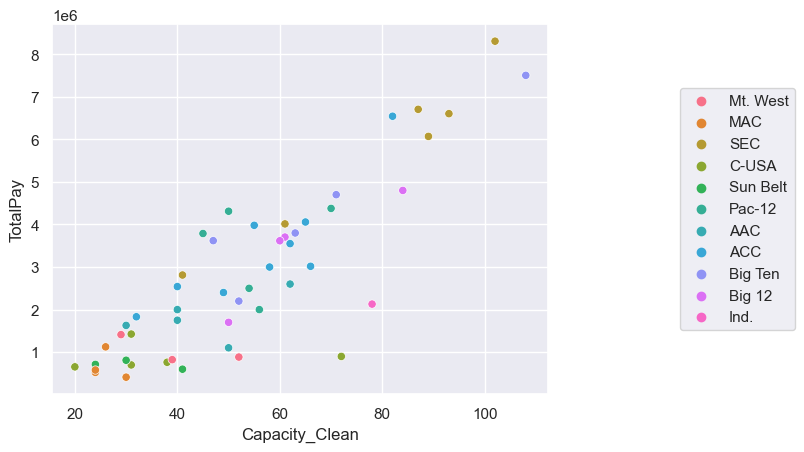

In [331]:
#plot pay against statiumsize  
s = sns.scatterplot(x="Capacity_Clean", y="TotalPay", hue="Conference_x", data=coachesfinal)
s.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()


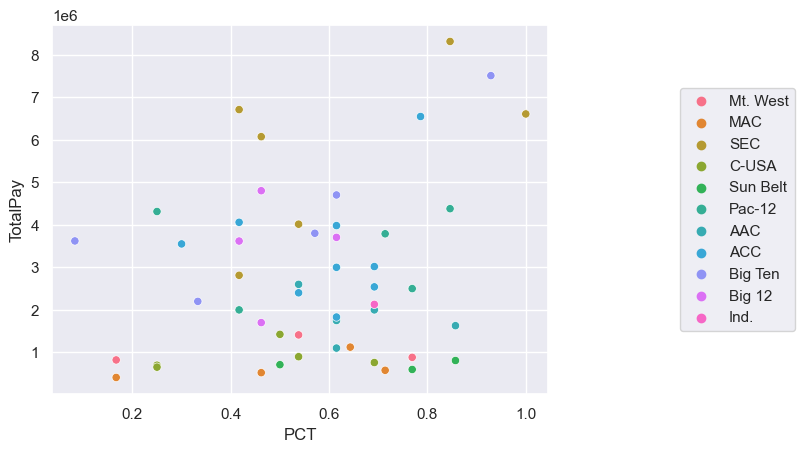

In [332]:
#plot pay against ratio  
s = sns.scatterplot(x="PCT", y="TotalPay", hue="Conference_x", data=coachesfinal)
s.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()

Text(0, 0.5, 'Count')

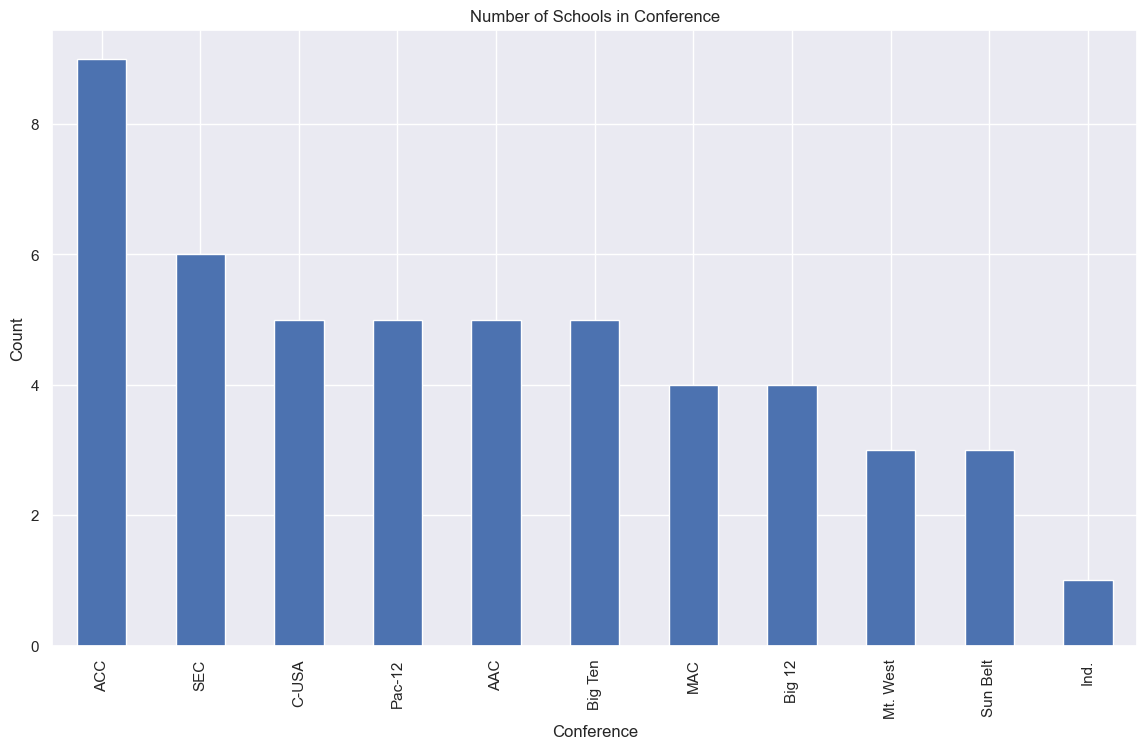

In [202]:
c = coachesfinal['Conference_x'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Schools in Conference")
c.set_xlabel("Conference")
c.set_ylabel("Count")

In [203]:
# sns.set(style="darkgrid")

# t = sns.FacetGrid(finalcoaches, col="Conference_x", hue="W", 
#                   hue_order=['W','L'],
#                   hue_kws=dict(marker=["^", "v"]))
# t.map(plt.scatter, "TotalPay", "Capacity_Clean", alpha=.7)
# t.add_legend();
# plt.show()

# this didn't plot any data 

In [204]:
#correlation matrix
corr_matrix = coachesfinal.corr()
print(corr_matrix)

                SchoolPay  TotalPay     Bonus  BonusPaid    Buyout  Capacity  \
SchoolPay        1.000000  0.999344  0.376255   0.544938  0.784932  0.860088   
TotalPay         0.999344  1.000000  0.383188   0.545105  0.791897  0.861662   
Bonus            0.376255  0.383188  1.000000   0.396114  0.568514  0.408976   
BonusPaid        0.544938  0.545105  0.396114   1.000000  0.688677  0.447487   
Buyout           0.784932  0.791897  0.568514   0.688677  1.000000  0.710867   
Capacity         0.860088  0.861662  0.408976   0.447487  0.710867  1.000000   
Capacity_Clean   0.859805  0.861406  0.409130   0.447243  0.710204  0.999927   
Cohort Year           NaN       NaN       NaN        NaN       NaN       NaN   
GSR              0.166424  0.165032 -0.187083  -0.196021 -0.060635  0.033515   
FGR             -0.043318 -0.042965 -0.324110  -0.236112 -0.204628 -0.223058   
W                0.254822  0.254376  0.072556   0.421923  0.289654  0.284193   
L               -0.273753 -0.273413 -0.0

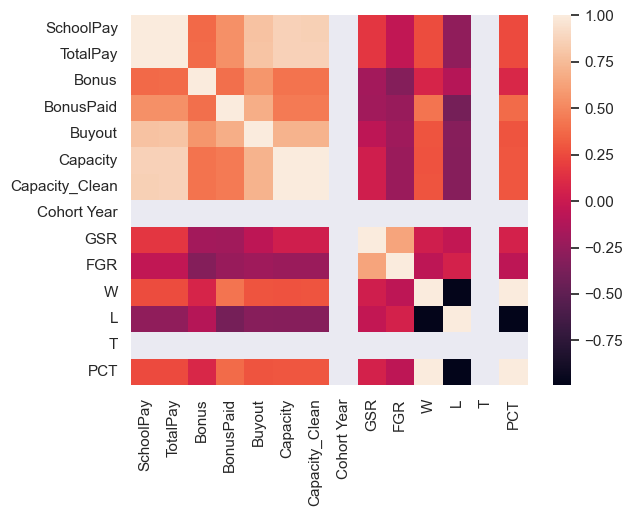

In [205]:
sns.heatmap(coachesfinal.corr());


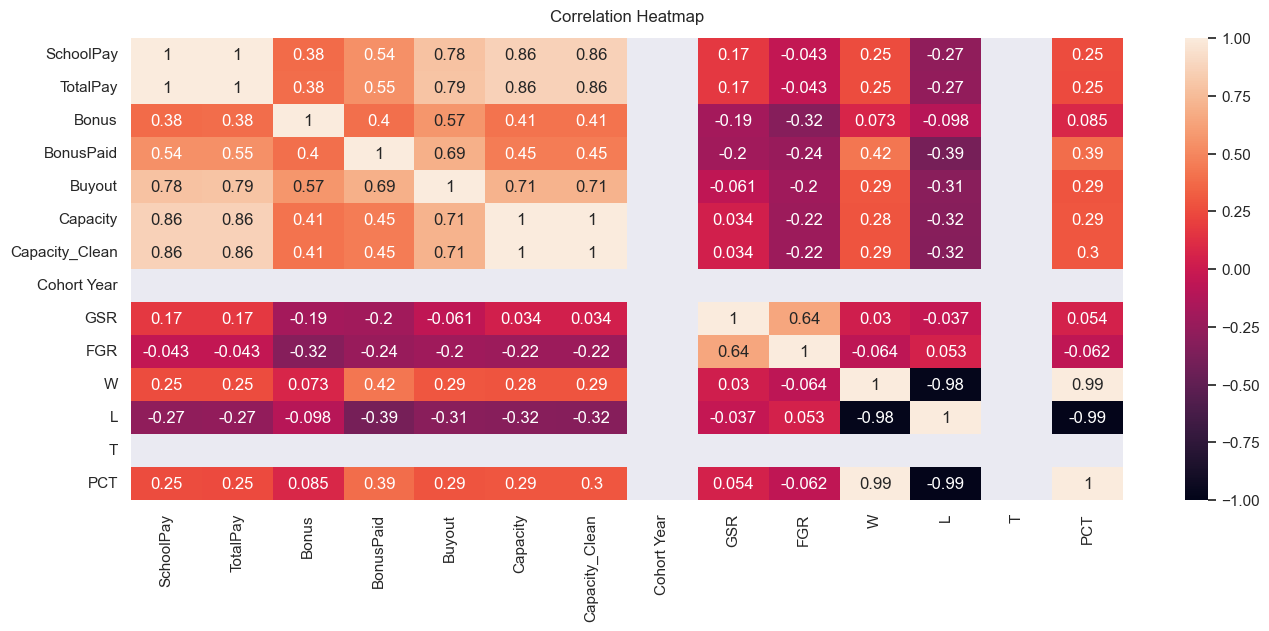

In [206]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(coachesfinal.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [208]:
coachesfinal = pd.DataFrame(coachesfinal)
coachesfinal.dtypes

coachesfinal.isnull().values.any()
coachesfinal.isnull().sum()


School            0
Conference_x      0
Coach             0
SchoolPay         0
TotalPay          0
Bonus             0
BonusPaid         0
Buyout            0
Stadium           0
Capacity          0
Capacity_Clean    0
Cohort Year       0
Conference        0
State             0
GSR               0
FGR               1
RANK              0
W                 0
L                 0
T                 0
PCT               0
dtype: int64

In [245]:
#build a model without the confrence data
# employ training-and-test regimen for model validation
pd.options.mode.chained_assignment = None  # default='warn'

np.random.seed(1234)
coachesfinal['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachesfinal))
coachesfinal_train = coachesfinal[coachesfinal['runiform'] >= 0.33]
coachesfinal_test = coachesfinal[coachesfinal['runiform'] < 0.33]
# check training data frame
print('\ncoachesfinal_train data frame (rows, columns): ',coachesfinal_train.shape)
print(coachesfinal_train.head())
# check test data frame
print('\ncoachesfinal_test data frame (rows, columns): ',coachesfinal_test.shape)
print(coachesfinal_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Capacity + GSR + PCT')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coachesfinal_train).fit()

# train_model_fit = sm.ols(formula= 'TotalPay ~ Capacity + GSR + PCT', data=coachesfinal_train)
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coachesfinal_train['TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coachesfinal_test['TotalPay'] = train_model_fit.predict(coachesfinal_test)

  


coachesfinal_train data frame (rows, columns):  (37, 22)
                   School  Conference_x              Coach  SchoolPay  \
1                   Akron             6       Terry Bowden   411000.0   
2                 Alabama             9         Nick Saban  8307000.0   
3   Alabama at Birmingham             4         Bill Clark   900000.0   
4       Appalachian State            10  Scott Satterfield   712500.0   
22             Cincinnati             0       Luke Fickell  2000000.0   

     TotalPay      Bonus  BonusPaid      Buyout               Stadium  \
1    412500.0   225000.0    50000.0    688500.0    InfoCision Stadium   
2   8307000.0  1100000.0   500000.0  33600000.0  Bryant Denny Stadium   
3    900000.0   950000.0   165471.0   3847500.0          Legion Field   
4    712500.0   295000.0   145000.0   2160417.0   Kidd Brewer Stadium   
22  2000000.0   625000.0        0.0   7100000.0       Nippert Stadium   

    Capacity  ...                    Conference  State   GSR   F

In [302]:
from sklearn import linear_model
linmodel = linear_model.LinearRegression(fit_intercept=True) 

LinearRegression()

LinearRegression()

In [303]:
lin_reg = LinearRegression()

y_train = coachesfinal_train[['TotalPay']]
X_train = coachesfinal_train[['Capacity', 'GSR', 'PCT']
                             lin_reg.fit(X_train, y_train)
                             

#Predict
y_test = coachesfinal_test[['TotalPay']]
X_test = coachesfinal_test[['Capacity', 'GSR', 'PCT']]
y_pred = lin_reg.predict(X_test)

SyntaxError: invalid syntax (1224199958.py, line 5)

In [248]:
# syracuse_noconf = coachesfinal[coachesfinal['School'] == 'Syracuse']
# lin_reg.predict(syracuse_noconf[['Capacity', 'GSR', 'PCT']])

# salary = lin_reg.predict(syracuse_noconf[['Capacity', 'GSR', 'PCT']])

# print(salary)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Conference_x

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [265]:
# #build a model with the confrence data
# # employ training-and-test regimen for model validation
# from sklearn import preprocessing
# le = LabelEncoder()
# coachesfinal.loc[:, 'Conference_x'] = le.fit_transform(coachesfinal['Conference_x'])

# np.random.seed(1234)
# coachesfinal['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachesfinal))
# coachesfinal_train = coachesfinal[coachesfinal['runiform'] >= 0.33]
# coachesfinal_test = coachesfinal[coachesfinal['runiform'] < 0.33]
# # check training data frame
# print('\ncoachesfinal_train data frame (rows, columns): ',coachesfinal_train.shape)
# print(coachesfinal_train.head())
# # check test data frame
# print('\ncoachesfinal_test data frame (rows, columns): ',coachesfinal_test.shape)
# print(coachesfinal_test.head())

# # specify a simple model with bobblehead entered last
# my_model2 = str('TotalPay ~ Capacity + GSR + PCT + Conference_x')

# # fit the model to the training set
# train_model_fit = smf.ols(my_model2, data = coachesfinal_train).fit()

# # train_model_fit = sm.ols(formula= 'TotalPay ~ Capacity + GSR + PCT', data=coachesfinal_train)
# # summary of model fit to the training set
# print(train_model_fit.summary())
# # training set predictions from the model fit to the training set
# coachesfinal_train['TotalPay'] = train_model_fit.fittedvalues

# # test set predictions from the model fit to the training set
# coachesfinal_test['TotalPay'] = train_model_fit.predict(coachesfinal_test)

  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [304]:

 from sklearn import linear_model
 linmodel = linear_model.LinearRegression(fit_intercept=True) 

 LinearRegression()

LinearRegression()

In [305]:
lin_reg = LinearRegression()

# train
y_train1 = coachesfinal_train[['TotalPay']]
X_train1 = coachesfinal_train[['Capacity', 'GSR', 'PCT', 'Conference_x']]
lin_reg.fit(X_train1, y_train1)
                             

#Predict
y_test1 = coachesfinal_test[['TotalPay']]
X_test1 = coachesfinal_test[['Capacity', 'GSR', 'PCT', 'Conference_x']]
y_pred = lin_reg.predict(X_test1)

In [254]:
# predict syracuse salary


syracuse = coachesfinal[coachesfinal['School'] == 'Syracuse']
lin_reg.predict(syracuse[['Capacity', 'GSR', 'PCT', 'Conference_x']])

salary = lin_reg.predict(syracuse[['Capacity', 'GSR', 'PCT', 'Conference_x']])

print(salary)

[[2370929.62884514]]


In [301]:
#big 10

train_10, test_10 = train_test_split(coachesfinal[coachesfinal['Conference_x'] == 3], test_size=0.33)

Y = train_10[['TotalPay']]
X = train_10[['Capacity', 'GSR', 'PCT']]



big10 = sm.OLS(Y, X)
ols_reg_big10 = big10.fit()
print(ols_reg_big10.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 30 Jan 2023   Prob (F-statistic):                nan
Time:                        17:03:58   Log-Likelihood:                 51.934
No. Observations:                   3   AIC:                            -97.87
Df Residuals:                       0   BIC:                            -100.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Capacity     105.1426        inf          0        n

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [297]:
ols_reg_big10.predict(syracuse[['Capacity', 'GSR', 'PCT']])
#$2,971,211.00

102    2.971211e+06
dtype: float64

In [299]:
#big east 

# big 10: split train + test
train_east, test_east = train_test_split(coachesfinal[coachesfinal['Conference_x'] == 1], test_size=0.33)

#
# big 10: train model
#
Y = train_east[['TotalPay']]
X = train_east[['Capacity', 'GSR', 'PCT']]



east = sm.OLS(Y, X)
ols_reg_east = east.fit()
print(ols_reg_east.summary())

                                 OLS Regression Results                                
Dep. Variable:               TotalPay   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              29.65
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                     0.00991
Time:                        19:41:49   Log-Likelihood:                         -89.250
No. Observations:                   6   AIC:                                      184.5
Df Residuals:                       3   BIC:                                      183.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [300]:
ols_reg_east.predict(syracuse[['Capacity', 'GSR', 'PCT']])
#$2,678,799.00 

102    2.678799e+06
dtype: float64